# Installing and importing required libraries

In [1]:
#import tensorflow as tf

In [2]:
#pip install pandas


In [3]:
#pip install numpy


In [4]:
#pip install matplotlib


In [5]:
#pip install seaborn


In [6]:
#pip install -U scikit-learn


In [7]:
#conda install -c conda-forge nomkl

In [8]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\steph\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steph\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steph\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steph\anaconda3\envs\tensor\lib\site-packages\tensorflow\pyth

In [9]:
fashion=keras.datasets.fashion_mnist

In [10]:
(X_train,y_train),(X_test,y_test) = fashion.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
X_test.shape

(10000, 28, 28)

In [14]:
# optimize the model with much higher accuracy, 
#as they are currently ranging from 0 to 255 corresponding to rgb values
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float')/255

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_name = ['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot']
class_name

['T-shirt/top',
 'Trouser',
 'pullover',
 'dress',
 'coat',
 'sandal',
 'shirt',
 'sneaker',
 'bag',
 'ankle boot']

In [17]:
y_train[0]

9

In [18]:
class_name[y_train[0]]

'ankle boot'

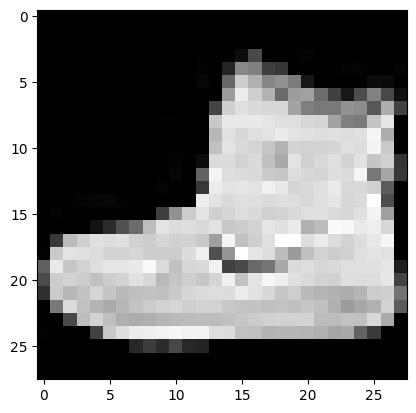

In [19]:
plt.imshow(X_train[0],cmap='gray')

The label for this image isTrouser


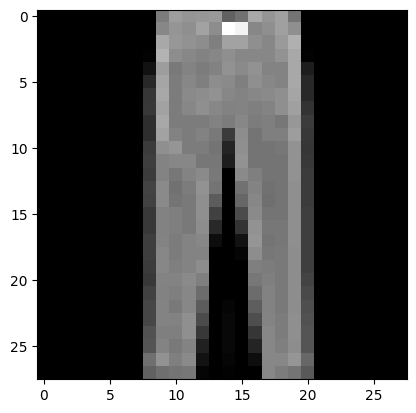

In [20]:
from random import randrange
item=randrange(60000)

plt.imshow(X_train[item],cmap='gray')
print("The label for this image is" + str(class_name[y_train[item]]))

In [21]:
SNN=keras.models.Sequential()
# in the first layer, we need 28*28 = 784 nodes
SNN.add(keras.layers.Flatten(input_shape=[28,28]))
SNN.add(keras.layers.Dense(300,activation="relu")) # Rectified Linear Unit: The prontal after Dense should be number of nodes of inputs
SNN.add(keras.layers.Dense(100,activation="relu"))# Second layer added
SNN.add(keras.layers.Dense(10,activation="softmax"))# Output layer with 10 outputs that we need to classify

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
SNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
SNN.layers

In [24]:
hidden1 = SNN.layers[1]

In [25]:
weights,biases = hidden1.get_weights()
biases
weights

array([[-0.03308317, -0.05531466, -0.02427507, ..., -0.02801345,
        -0.04670569, -0.0195883 ],
       [-0.02770342, -0.02456238, -0.06425497, ..., -0.01464936,
        -0.05556959, -0.0169101 ],
       [-0.00139569,  0.04890883,  0.0227638 , ..., -0.04858377,
         0.02163523, -0.00072044],
       ...,
       [ 0.0562031 ,  0.07366788,  0.02913879, ...,  0.03166641,
         0.04195946, -0.02431457],
       [ 0.03474554,  0.02431968, -0.06823403, ...,  0.05405933,
        -0.06799836, -0.03408302],
       [ 0.0422651 ,  0.05945006,  0.07374491, ..., -0.01944026,
        -0.0358686 , -0.00079822]], dtype=float32)

In [26]:
SNN.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [27]:
history=SNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.7055 - acc: 0.7682
Epoch 2/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4790 - acc: 0.8349
Epoch 3/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.4353 - acc: 0.8475
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4078 - acc: 0.8574
Epoch 5/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3883 - acc: 0.8638
Epoch 6/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3717 - acc: 0.8701
Epoch 7/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3583 - acc: 0.8732
Epoch 8/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3475 - acc: 0.8766
Epoch 9/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.3377 - acc: 0.8788
Epoch 10/10
60000/60000 [==============================] - 1s 24us/sample - loss: 

In [28]:
SNN.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 16us/sample - loss: 0.3889 - acc: 0.8619


[0.3889450665950775, 0.8619]

<AxesSubplot:>

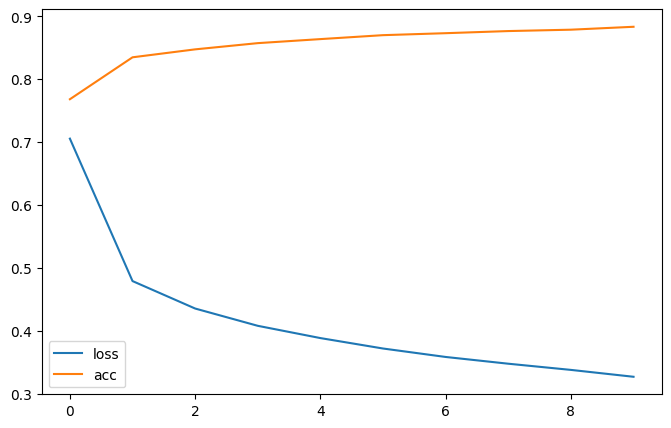

In [29]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [30]:
predict_y=SNN.predict(X_test)

In [31]:
predict_y.round(2)

array([[0.  , 0.  , 0.  , ..., 0.08, 0.  , 0.81],
       [0.  , 0.  , 0.98, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.97, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.02, 0.01, 0.  ]], dtype=float32)

In [32]:
predicted_class=np.argmax(predict_y,axis=1)

In [33]:
predicted_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [34]:
np.array(class_name)[predicted_class]

array(['ankle boot', 'pullover', 'Trouser', ..., 'bag', 'Trouser',
       'sandal'], dtype='<U11')

the prediction is shirt


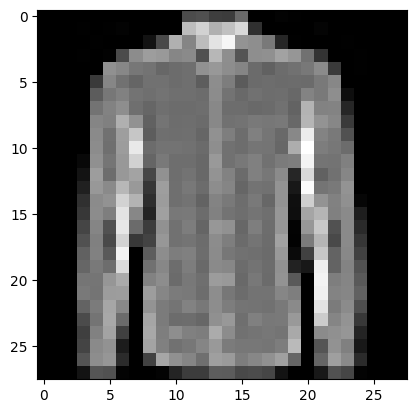

In [35]:
item=randrange(10000)
plt.imshow(X_test[item], cmap='gray')
print("the prediction is "+ str(class_name[predicted_class[item]]))

In [36]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,predicted_class)

([<matplotlib.axis.YTick at 0x1ef38d4def0>,
 [Text(0, 0.5, 'T-shirt/top'),
  Text(0, 1.5, 'Trouser'),
  Text(0, 2.5, 'pullover'),
  Text(0, 3.5, 'dress'),
  Text(0, 4.5, 'coat'),
  Text(0, 5.5, 'sandal'),
  Text(0, 6.5, 'shirt'),
  Text(0, 7.5, 'sneaker'),
  Text(0, 8.5, 'bag'),
  Text(0, 9.5, 'ankle boot')])

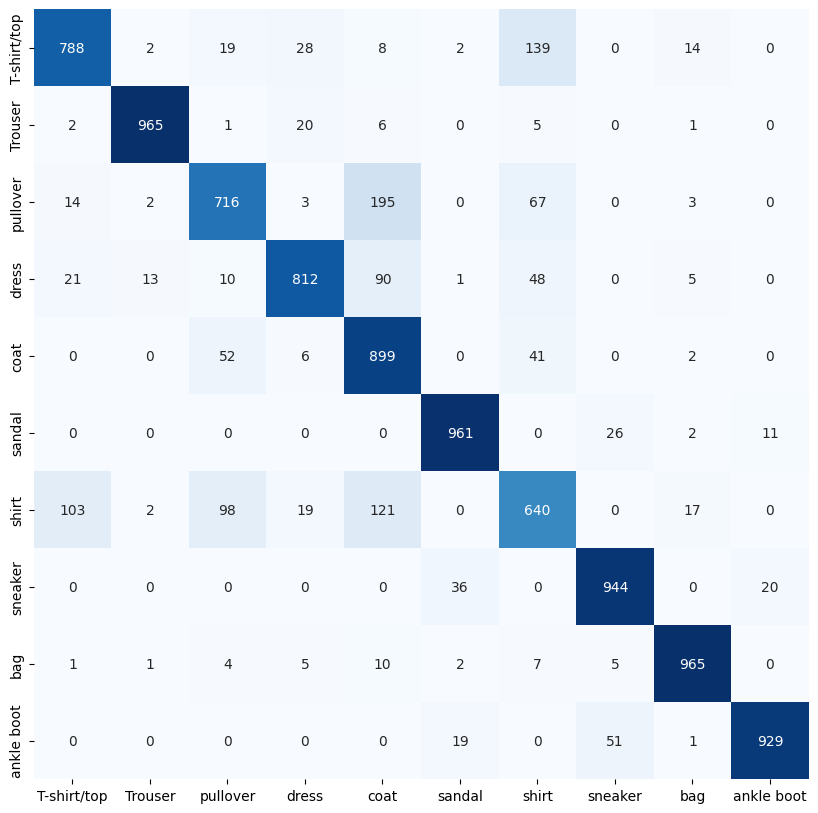

In [37]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])
plt.yticks(np.arange(10)+0.5,['T-shirt/top',
              'Trouser',
              'pullover',
              'dress',
             'coat',
             'sandal',
             'shirt',
             'sneaker',
             'bag',
             'ankle boot'])